In [24]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [25]:
import warnings
warnings.filterwarnings('ignore')


In [26]:
#Import Necessary Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
random.shuffle(image_data)

In [42]:

# Categories
CATEGORIES = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
IMG_SIZE = 50

# Data path
data_path = r"C:\Users\USER\Desktop\Uunchai\leapGestRecog"


In [31]:
# Preparing the data
image_data = []

for dr in os.listdir(data_path):
    dr_path = os.path.join(data_path, dr)
    if not os.path.isdir(dr_path):
        continue
    for category in CATEGORIES:
        path = os.path.join(dr_path, category)
        if not os.path.isdir(path):
            continue
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is not None:
                    resized_img = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                    image_data.append([resized_img, CATEGORIES.index(category)])
            except Exception as e:
                print(f"Failed to process image {img} in {path}: {e}")
                pass


In [32]:
# Check the first data entry
if image_data:
    print(image_data[0])
else:
    print("No image data found.")

# Shuffle the data
import random
random.shuffle(image_data)

# Splitting data into features and labels
input_data = []
label = []

for features, label_value in image_data:
    input_data.append(features)
    label.append(label_value)

[array([[5, 4, 4, ..., 3, 4, 2],
       [5, 4, 5, ..., 3, 3, 3],
       [4, 5, 4, ..., 4, 5, 3],
       ...,
       [4, 5, 5, ..., 5, 5, 5],
       [5, 5, 6, ..., 5, 7, 4],
       [4, 7, 5, ..., 5, 4, 4]], dtype=uint8), 0]


In [33]:

# Convert to numpy arrays and normalize
input_data = np.array(input_data) / 255.0
label = np.array(label)

# Reshape input data
input_data = input_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Convert labels to categorical
label = to_categorical(label)

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.2, random_state=42, shuffle=True)


In [36]:
# Model definition
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    Activation('relu'),
    Conv2D(filters=32, kernel_size=(3,3)),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


from keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Compile and train the model again
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_test, y_test))

# Model summary
model.summary()


Epoch 1/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.3220 - val_accuracy: 1.0000 - val_loss: 0.9023
Epoch 2/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.8665 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 3/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 4/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0034


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     4,333,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,691,926 (33.16 MB)

 Trainable params: 4,345,962 (16.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,345,964 (16.58 MB)

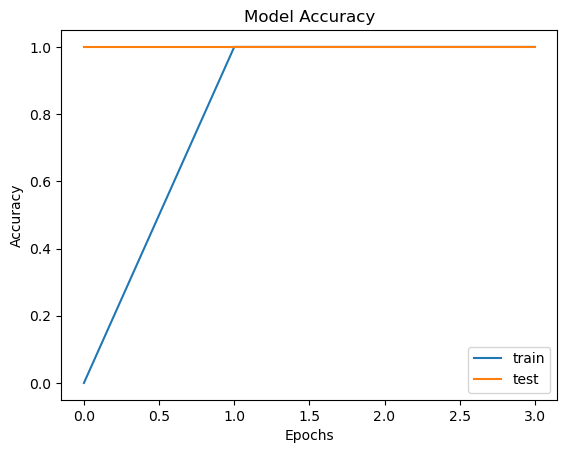

In [37]:
# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [38]:
# Detailed training and validation plots
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')


<Figure size 2000x800 with 0 Axes>

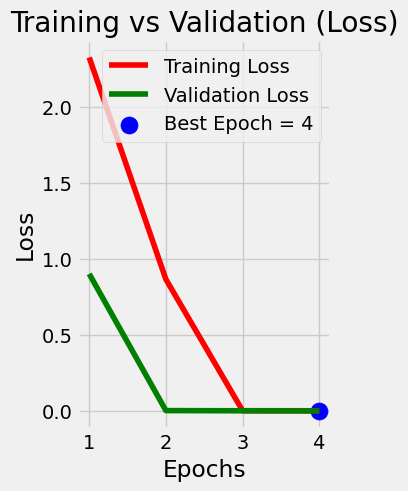

In [39]:
plt.subplot(1,2,1)
plt.plot(Epochs, train_loss, 'r', label='Training Loss')
plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training vs Validation (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


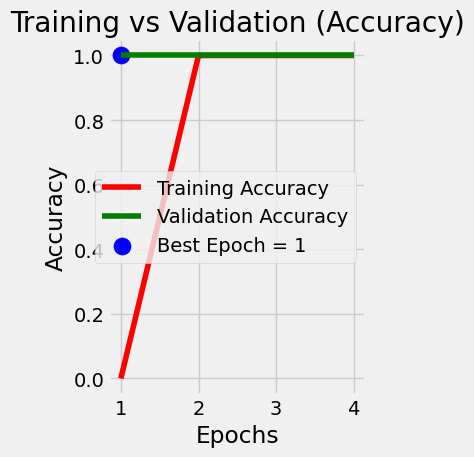

In [40]:
plt.subplot(1,2,2)
plt.plot(Epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s=150, c='blue', label=acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

# Save the model in Keras format
model.save('gesture_recognition_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0034
Test accuracy: 100.00%


In [43]:
fig = plt.figure(figsize=(12,2))
fig.suptitle("Images - Palm Finger")

for i in range(5):
  img = Image.open(path+'/'+df['filepaths'][i])
  img = img.resize(im_size)
  plt.subplot(1, 5, i+1)
  plt.imshow(img, cmap='hot')
  # print(img.shape)
plt.show()

TypeError: string indices must be integers, not 'str'

<Figure size 1200x200 with 0 Axes>